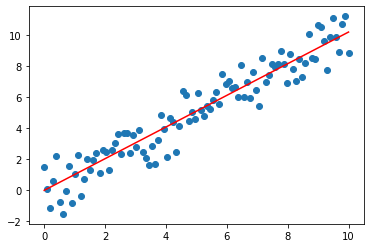

In [ ]:
#linear_regression
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_train = np.linspace(0,10,100)
y_train = x_train + np.random.normal(0,1,100)
alpha = 0.01
iter = 1000
m = len(x_train)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(np.random.randn(),name='weight')
b = tf.Variable(np.random.randn(),name='bias')
h = tf.add(tf.multiply(W,X),b)

#define cost fn
cost = tf.reduce_sum(tf.square(Y-h))/(2*m)
optimize = tf.train.GradientDescentOptimizer(alpha).minimize(cost)  #gradient descent

#tensorflow session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(iter):
  for (x,y) in zip(x_train,y_train):
    sess.run(optimize,feed_dict={X:x,Y:y})

W_final = sess.run(W)
b_final = sess.run(b)
sess.close()
plt.plot(x_train,y_train,'o') #training set

#fitting
y = W_final*x_train+b_final
plt.plot(x_train,y,'r')
plt.show()